In [1]:
from pyecharts import options as opts
from pyecharts.charts import Map, Funnel
import pandas as pd
import numpy as np
df = pd.read_csv('profile_holdings_monthly.csv')
df.head(5)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,PROFILE_ID,MONTH_BALANCE,BEGINNING_TOTAL_HOLDINGS_GBP,END_TOTAL_HOLDINGS_GBP,BEGINNING_EQUITY_GBP,END_EQUITY_GBP,BEGINNING_INTEREST_GBP,END_INTEREST_GBP
0,37416056,2023-04-01,0.00,0.00,NaN,NaN,NaN,NaN
1,38894645,2023-05-01,8.39,60.99,NaN,NaN,NaN,NaN
2,35710681,2023-05-01,1.15,21.15,NaN,NaN,NaN,NaN
3,39261107,2023-06-01,0.00,0.00,NaN,NaN,NaN,NaN
4,39584827,2023-06-01,6.11,10.33,NaN,NaN,NaN,NaN


In [2]:
# Function to display the count of non-null values and unique categories in a DataFrame
def data_info(df):
    print(f'{df.info()}')
    data_info_df = pd.DataFrame(index=df.columns.tolist(), columns=['Non-Null Count', 'Unique Categories', 'Content (First 10 Values)'])
    
    for col in df.columns.tolist():
        content = ' '.join([str(val) for val in df[col].unique().tolist()[:10]]).replace('nan', '')
        unique_count = len(df[col].unique().tolist())
        total_count = len(df[col].tolist())
        missing_count = df[df[col].isna()].shape[0]
        
        data_info_df.loc[col, 'Non-Null Count'] = total_count - missing_count
        data_info_df.loc[col, 'Unique Categories'] = unique_count
        data_info_df.loc[col, 'Content (First 10 Values)'] = content
    
    return data_info_df

data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18010 entries, 0 to 18009
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROFILE_ID                    18010 non-null  int64  
 1   MONTH_BALANCE                 18010 non-null  object 
 2   BEGINNING_TOTAL_HOLDINGS_GBP  12816 non-null  float64
 3   END_TOTAL_HOLDINGS_GBP        18010 non-null  float64
 4   BEGINNING_EQUITY_GBP          65 non-null     float64
 5   END_EQUITY_GBP                96 non-null     float64
 6   BEGINNING_INTEREST_GBP        86 non-null     float64
 7   END_INTEREST_GBP              153 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB
None


,Non-Null Count,Unique Categories,Content (First 10 Values)
PROFILE_ID,18010,5387,37416056 38894645 35710681 39261107 39584827 3...
MONTH_BALANCE,18010,6,2023-04-01 2023-05-01 2023-06-01 2023-02-01 20...
BEGINNING_TOTAL_HOLDINGS_GBP,12816,4539,0.0 8.39 1.15 6.11 19.6 222.73 20.22 1.67 2185.5
END_TOTAL_HOLDINGS_GBP,18010,6165,0.0 60.99 21.15 10.33 19.41 62.5 21.73 12.91 1...
BEGINNING_EQUITY_GBP,65,57,530.2 9.67 3.2 0.04 3.46 436.24 56.14 33.6 33...
END_EQUITY_GBP,96,87,424.57 0.35 0.05 3.44 3283.55 454.63 0.0 33.7...
BEGINNING_INTEREST_GBP,86,84,9089.89 2533.98 20.05 120142.75 148.79 34.56 ...
END_INTEREST_GBP,153,149,9124.49 1.06 5.28 105.66 103115.44 28.97 0.29...


In [3]:
import pandas as pd
import numpy as np

df['MONTH_BALANCE'] = pd.to_datetime(df['MONTH_BALANCE'])


missing_summary = df.isnull().sum()


df = df[df['BEGINNING_TOTAL_HOLDINGS_GBP'] > 0]
df = df[df['END_TOTAL_HOLDINGS_GBP'] > 0]

currency_columns = [
    'BEGINNING_TOTAL_HOLDINGS_GBP', 'END_TOTAL_HOLDINGS_GBP',
    'BEGINNING_EQUITY_GBP', 'END_EQUITY_GBP',
    'BEGINNING_INTEREST_GBP', 'END_INTEREST_GBP'
]


for col in currency_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df[currency_columns] = df[currency_columns].applymap(lambda x: np.nan if x < 0 else x)


df.fillna(df.groupby('MONTH_BALANCE')[currency_columns].transform('median'), inplace=True)


clean_summary = df.describe()

print("Missing value summary:\n", missing_summary)
print("\nData description after cleaning:\n", clean_summary)


Missing value summary:
 PROFILE_ID                          0
MONTH_BALANCE                       0
BEGINNING_TOTAL_HOLDINGS_GBP     5194
END_TOTAL_HOLDINGS_GBP              0
BEGINNING_EQUITY_GBP            17945
END_EQUITY_GBP                  17914
BEGINNING_INTEREST_GBP          17924
END_INTEREST_GBP                17857
dtype: int64

Data description after cleaning:
          PROFILE_ID                  MONTH_BALANCE  \
count  7.545000e+03                           7545   
mean   3.703827e+07  2023-04-23 08:50:34.592445184   
min    3.525219e+07            2023-01-01 00:00:00   
25%    3.593293e+07            2023-04-01 00:00:00   
50%    3.681014e+07            2023-05-01 00:00:00   
75%    3.795725e+07            2023-06-01 00:00:00   
max    4.033609e+07            2023-06-01 00:00:00   
std    1.286938e+06                            NaN   

       BEGINNING_TOTAL_HOLDINGS_GBP  END_TOTAL_HOLDINGS_GBP  \
count                   7545.000000             7545.000000   
mean       

/var/folders/1j/c_hmjlfn5hj2wfm1wq7x0m_40000gn/T/ipykernel_94798/2368631506.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[currency_columns] = df[currency_columns].applymap(lambda x: np.nan if x < 0 else x)


In [4]:
data_info(df)

<class 'pandas.core.frame.DataFrame'>
Index: 7545 entries, 1 to 18008
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PROFILE_ID                    7545 non-null   int64         
 1   MONTH_BALANCE                 7545 non-null   datetime64[ns]
 2   BEGINNING_TOTAL_HOLDINGS_GBP  7545 non-null   float64       
 3   END_TOTAL_HOLDINGS_GBP        7545 non-null   float64       
 4   BEGINNING_EQUITY_GBP          7539 non-null   float64       
 5   END_EQUITY_GBP                7539 non-null   float64       
 6   BEGINNING_INTEREST_GBP        7539 non-null   float64       
 7   END_INTEREST_GBP              7539 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 530.5 KB
None


,Non-Null Count,Unique Categories,Content (First 10 Values)
PROFILE_ID,7545,2867,38894645 35710681 39584827 36508478 38213782 3...
MONTH_BALANCE,7545,6,2023-05-01 00:00:00 2023-06-01 00:00:00 2023-0...
BEGINNING_TOTAL_HOLDINGS_GBP,7545,4288,8.39 1.15 6.11 19.6 222.73 20.22 1.67 2185.5 2...
END_TOTAL_HOLDINGS_GBP,7545,4458,60.99 21.15 10.33 19.41 62.5 12.91 1.67 6265.9...
BEGINNING_EQUITY_GBP,7539,59,20.03 27.009999999999998 9.67 530.2 4.315 4.28...
END_EQUITY_GBP,7539,75,15.254999999999999 49.55 20.03 424.57 0.35 9.6...
BEGINNING_INTEREST_GBP,7539,83,754.52 776.05 184.425 34.71 20.05 9089.89 2533...
END_INTEREST_GBP,7539,106,732.935 1200.16 331.87 105.36 34.7 9124.49 1.0...


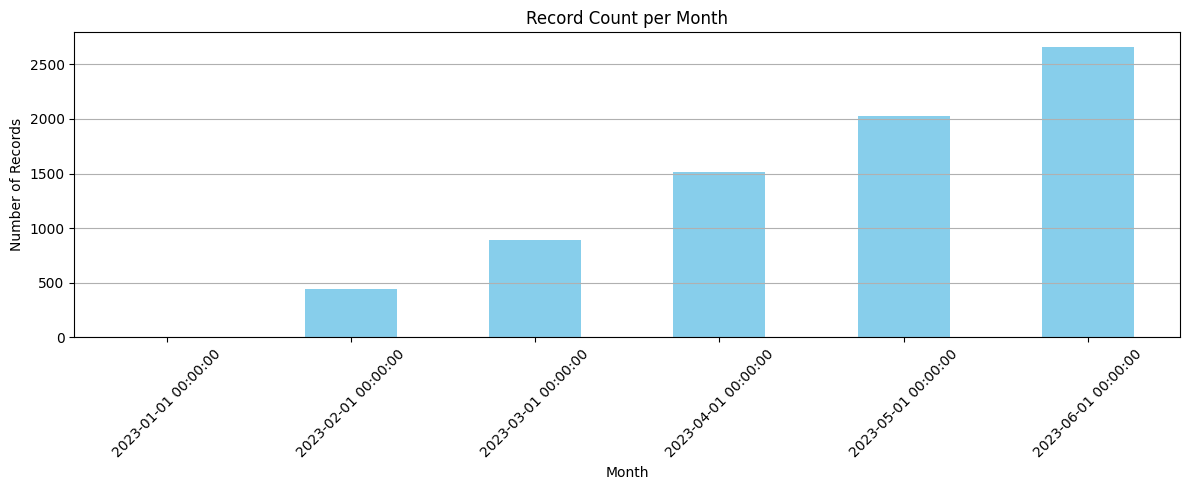

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



df['MONTH_BALANCE'] = pd.to_datetime(df['MONTH_BALANCE'])


month_counts = df['MONTH_BALANCE'].value_counts().sort_index()


plt.figure(figsize=(12, 5))
month_counts.plot(kind='bar', color='skyblue')

plt.title("Record Count per Month")
plt.xlabel("Month")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# number of customer forecast

/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


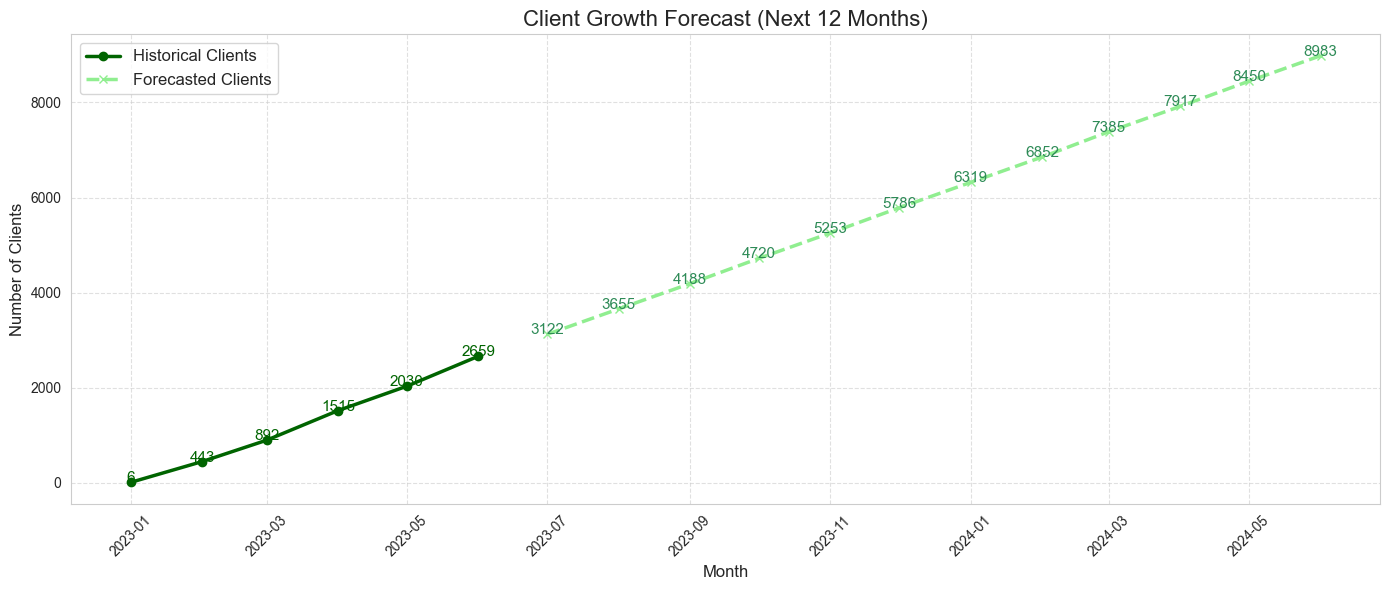

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Step 2: Monthly client count
monthly_clients = df.groupby('MONTH_BALANCE')['PROFILE_ID'].nunique().reset_index()
monthly_clients.columns = ['MONTH', 'NUM_CLIENTS']
monthly_clients = monthly_clients.sort_values('MONTH')
monthly_clients['MONTH_NUM'] = np.arange(len(monthly_clients))

# Step 3: Linear regression forecast
X = monthly_clients[['MONTH_NUM']]
y = monthly_clients['NUM_CLIENTS']
model = LinearRegression()
model.fit(X, y)

# Forecast next 12 months
future_months = pd.date_range(start=monthly_clients['MONTH'].max() + pd.DateOffset(months=1), periods=12, freq='MS')
future_month_nums = np.arange(len(monthly_clients), len(monthly_clients) + 12).reshape(-1, 1)
future_preds = model.predict(future_month_nums)

# Combine for plotting
future_df = pd.DataFrame({
    'MONTH': future_months,
    'NUM_CLIENTS': future_preds,
    'MONTH_NUM': future_month_nums.flatten()
})
combined = pd.concat([monthly_clients[['MONTH', 'NUM_CLIENTS']], future_df], ignore_index=True)

# Step 4: Beautified Plot
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Plot historical 
plt.plot(monthly_clients['MONTH'], monthly_clients['NUM_CLIENTS'],
         label='Historical Clients', marker='o', color='#006400', linewidth=2.5)
for x, y in zip(monthly_clients['MONTH'], monthly_clients['NUM_CLIENTS']):
    plt.text(x, y + 1, f'{int(y)}', ha='center', fontsize=11, color='#006400')

# Plot forecast 
plt.plot(future_df['MONTH'], future_df['NUM_CLIENTS'],
         label='Forecasted Clients', linestyle='--', marker='x', color='#90EE90', linewidth=2.5)
for x, y in zip(future_df['MONTH'], future_df['NUM_CLIENTS']):
    plt.text(x, y + 1, f'{int(y)}', ha='center', fontsize=11, color='#2E8B57')

# Formatting
plt.title("Client Growth Forecast (Next 12 Months)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Clients", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


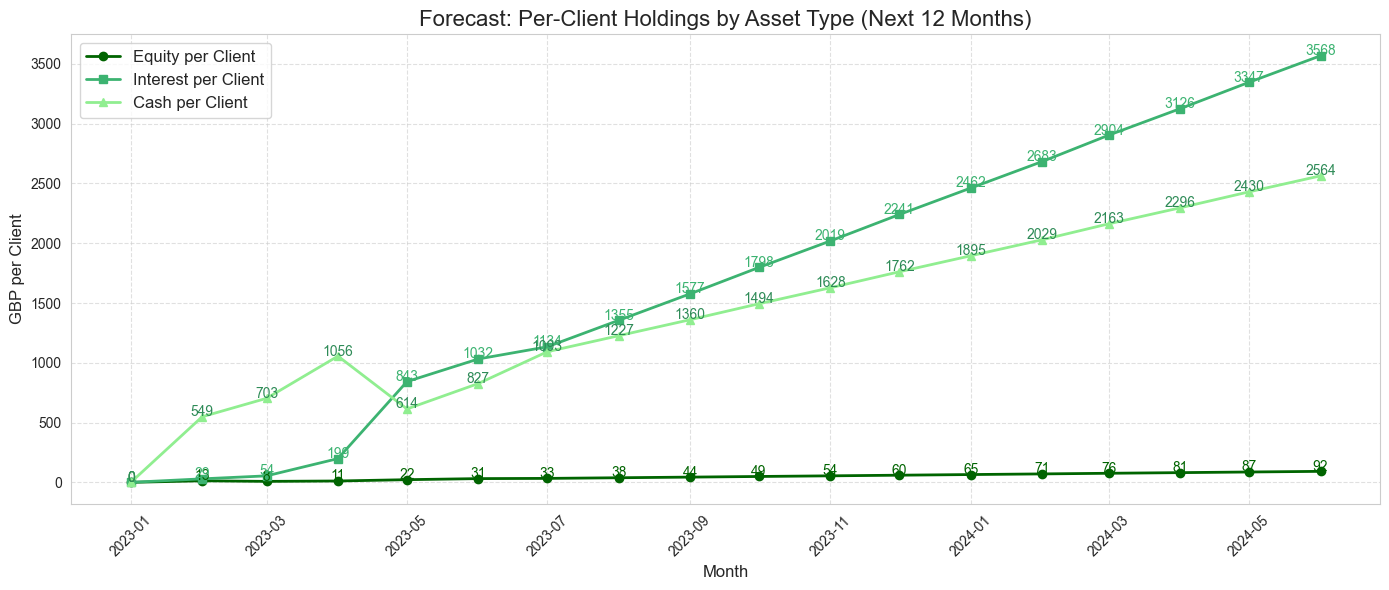

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Step 2: Derive cash
df['BEGINNING_CASH_GBP'] = df['BEGINNING_TOTAL_HOLDINGS_GBP'] - df['BEGINNING_EQUITY_GBP'] - df['BEGINNING_INTEREST_GBP']

# Step 3: Aggregate by month
monthly_agg = df.groupby('MONTH_BALANCE').agg({
    'PROFILE_ID': 'nunique',
    'BEGINNING_EQUITY_GBP': 'sum',
    'BEGINNING_INTEREST_GBP': 'sum',
    'BEGINNING_CASH_GBP': 'sum'
}).reset_index()

monthly_agg.columns = ['MONTH', 'NUM_CLIENTS', 'TOTAL_EQUITY', 'TOTAL_INTEREST', 'TOTAL_CASH']

# Step 4: Calculate per-client holdings
monthly_agg['EQUITY_PER_CLIENT'] = monthly_agg['TOTAL_EQUITY'] / monthly_agg['NUM_CLIENTS']
monthly_agg['INTEREST_PER_CLIENT'] = monthly_agg['TOTAL_INTEREST'] / monthly_agg['NUM_CLIENTS']
monthly_agg['CASH_PER_CLIENT'] = monthly_agg['TOTAL_CASH'] / monthly_agg['NUM_CLIENTS']
monthly_agg['MONTH_NUM'] = np.arange(len(monthly_agg))

# Step 5: Predict future
future_months = pd.date_range(start=monthly_agg['MONTH'].max() + pd.DateOffset(months=1), periods=12, freq='MS')
future_month_nums = np.arange(len(monthly_agg), len(monthly_agg) + 12)

def forecast_trend(column):
    model = LinearRegression()
    model.fit(monthly_agg[['MONTH_NUM']], monthly_agg[column])
    return model.predict(future_month_nums.reshape(-1, 1))

forecast_df = pd.DataFrame({
    'MONTH': future_months,
    'EQUITY_PER_CLIENT': forecast_trend('EQUITY_PER_CLIENT'),
    'INTEREST_PER_CLIENT': forecast_trend('INTEREST_PER_CLIENT'),
    'CASH_PER_CLIENT': forecast_trend('CASH_PER_CLIENT')
})

# Combine
combined = pd.concat([
    monthly_agg[['MONTH', 'EQUITY_PER_CLIENT', 'INTEREST_PER_CLIENT', 'CASH_PER_CLIENT']],
    forecast_df
])

# Step 6: Plot with annotations
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Plot equity
plt.plot(combined['MONTH'], combined['EQUITY_PER_CLIENT'], label='Equity per Client', color='#006400', marker='o', linewidth=2)
for x, y in zip(combined['MONTH'], combined['EQUITY_PER_CLIENT']):
    plt.text(x, y + 5, f'{y:.0f}', ha='center', fontsize=10, color='#006400')

# Plot interest
plt.plot(combined['MONTH'], combined['INTEREST_PER_CLIENT'], label='Interest per Client', color='#3CB371', marker='s', linewidth=2)
for x, y in zip(combined['MONTH'], combined['INTEREST_PER_CLIENT']):
    plt.text(x, y + 5, f'{y:.0f}', ha='center', fontsize=10, color='#3CB371')

# Plot cash
plt.plot(combined['MONTH'], combined['CASH_PER_CLIENT'], label='Cash per Client', color='#90EE90', marker='^', linewidth=2)
for x, y in zip(combined['MONTH'], combined['CASH_PER_CLIENT']):
    plt.text(x, y + 5, f'{y:.0f}', ha='center', fontsize=10, color='#2E8B57')

# Styling
plt.title("Forecast: Per-Client Holdings by Asset Type (Next 12 Months)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("GBP per Client", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


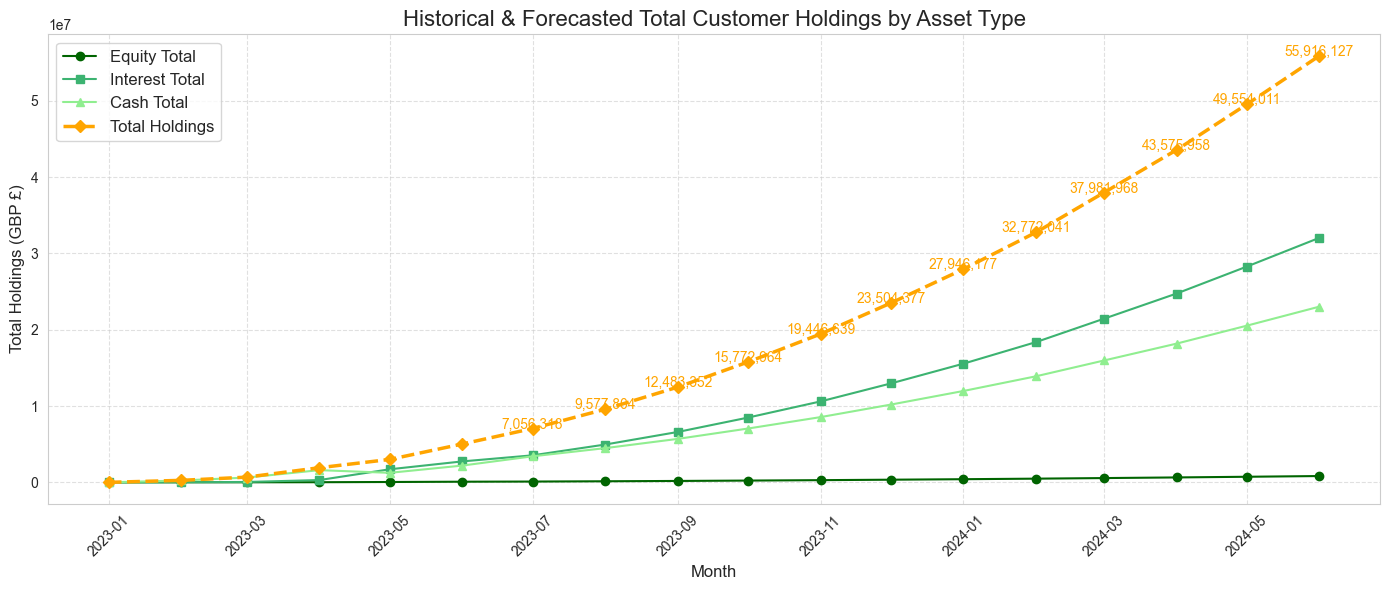

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Step 2: Derive cash field
df['BEGINNING_CASH_GBP'] = df['BEGINNING_TOTAL_HOLDINGS_GBP'] - df['BEGINNING_EQUITY_GBP'] - df['BEGINNING_INTEREST_GBP']

# Step 3: Monthly aggregation
monthly = df.groupby('MONTH_BALANCE').agg({
    'PROFILE_ID': 'nunique',
    'BEGINNING_EQUITY_GBP': 'sum',
    'BEGINNING_INTEREST_GBP': 'sum',
    'BEGINNING_CASH_GBP': 'sum'
}).reset_index()

monthly.columns = ['MONTH', 'NUM_CLIENTS', 'TOTAL_EQUITY', 'TOTAL_INTEREST', 'TOTAL_CASH']

# Step 4: Compute per-client holdings
monthly['EQUITY_PER_CLIENT'] = monthly['TOTAL_EQUITY'] / monthly['NUM_CLIENTS']
monthly['INTEREST_PER_CLIENT'] = monthly['TOTAL_INTEREST'] / monthly['NUM_CLIENTS']
monthly['CASH_PER_CLIENT'] = monthly['TOTAL_CASH'] / monthly['NUM_CLIENTS']
monthly['TOTAL_HOLDINGS'] = monthly['TOTAL_EQUITY'] + monthly['TOTAL_INTEREST'] + monthly['TOTAL_CASH']
monthly['MONTH_NUM'] = np.arange(len(monthly))

# Step 5: Linear trend prediction
def forecast_linear(col):
    model = LinearRegression()
    model.fit(monthly[['MONTH_NUM']], monthly[col])
    return model.predict(np.arange(len(monthly), len(monthly)+12).reshape(-1, 1))

# Step 6: Forecast future months
future_months = pd.date_range(start=monthly['MONTH'].max() + pd.DateOffset(months=1), periods=12, freq='MS')
future_df = pd.DataFrame({
    'MONTH': future_months,
    'NUM_CLIENTS': forecast_linear('NUM_CLIENTS'),
    'EQUITY_PER_CLIENT': forecast_linear('EQUITY_PER_CLIENT'),
    'INTEREST_PER_CLIENT': forecast_linear('INTEREST_PER_CLIENT'),
    'CASH_PER_CLIENT': forecast_linear('CASH_PER_CLIENT')
})

# Step 7: Compute future total holdings
future_df['TOTAL_EQUITY'] = future_df['NUM_CLIENTS'] * future_df['EQUITY_PER_CLIENT']
future_df['TOTAL_INTEREST'] = future_df['NUM_CLIENTS'] * future_df['INTEREST_PER_CLIENT']
future_df['TOTAL_CASH'] = future_df['NUM_CLIENTS'] * future_df['CASH_PER_CLIENT']
future_df['TOTAL_HOLDINGS'] = future_df['TOTAL_EQUITY'] + future_df['TOTAL_INTEREST'] + future_df['TOTAL_CASH']

# Step 8: Combine historical + future
combined = pd.concat([monthly[['MONTH', 'TOTAL_EQUITY', 'TOTAL_INTEREST', 'TOTAL_CASH', 'TOTAL_HOLDINGS']],
                      future_df[['MONTH', 'TOTAL_EQUITY', 'TOTAL_INTEREST', 'TOTAL_CASH', 'TOTAL_HOLDINGS']]])

# Step 9: Plot
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Equity
plt.plot(combined['MONTH'], combined['TOTAL_EQUITY'], label='Equity Total', color='#006400', marker='o')
# Interest
plt.plot(combined['MONTH'], combined['TOTAL_INTEREST'], label='Interest Total', color='#3CB371', marker='s')
# Cash
plt.plot(combined['MONTH'], combined['TOTAL_CASH'], label='Cash Total', color='#90EE90', marker='^')
# Total holdings (橙色)
plt.plot(combined['MONTH'], combined['TOTAL_HOLDINGS'], label='Total Holdings', color='orange', linestyle='--', marker='D', linewidth=2.5)

# Add labels only for future total holdings
for x, y in zip(future_df['MONTH'], future_df['TOTAL_HOLDINGS']):
    plt.text(x, y + 1000, f'{int(y):,}', ha='center', fontsize=10, color='orange')

# Formatting
plt.title("Historical & Forecasted Total Customer Holdings by Asset Type", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Holdings (GBP £)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
